In [1]:
# !pip install influxdb-client
# !pip install brokenaxes

In [2]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import json
from pathlib import Path

In [3]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org,
    timeout=30_000
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [4]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 4)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
142758   125970.0      29.0             0.0            0.0       200.0   
142759   125970.0      30.0             0.0            0.0       200.0   
142760   125970.0      31.0             0.0            0.0       200.0   
142761   125970.0      32.0             0.0            0.0       200.0   
142762   125970.0      33.0             0.0            0.0       200.0   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [5]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 5)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
142756   125970.0      29.0             0.0            0.0       200.0   
142757   125970.0      30.0             0.0            0.0       200.0   
142758   125970.0      31.0             0.0            0.0       200.0   
142759   125970.0      32.0             0.0            0.0       200.0   
142760   125970.0      33.0             0.0            0.0       200.0   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [6]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 6)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0        1.000000           24.0  350.000000  \
1            30.0       1.0        1.000000           24.0  350.000000   
2            30.0       2.0        1.000000           24.0  350.000000   
3            30.0       3.0        1.000000           24.0  350.000000   
4            30.0       4.0        1.000000           24.0  350.000000   
...           ...       ...             ...            ...         ...   
142758   125970.0      29.0        0.000000            0.0  200.000000   
142759   125970.0      30.0        0.000000            0.0  200.000000   
142760   125970.0      31.0        0.041667            1.0  200.010851   
142761   125970.0      32.0        0.000000            0.0  200.000000   
142762   125970.0      33.0        0.000000            0.0  200.000000   

         energyUsage  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [7]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-10-24T18:15:00Z, stop: 2023-10-24T19:30:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [8]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 33]
print(df_total_power_standard)

        timestamp  serverId   energyUsage
33           30.0        33  3.467975e+05
67           60.0        33  7.037975e+05
101          90.0        33  1.060798e+06
135         120.0        33  1.417798e+06
169         150.0        33  1.774798e+06
...           ...       ...           ...
142626   125850.0        33  8.634029e+08
142660   125880.0        33  8.636069e+08
142694   125910.0        33  8.638109e+08
142728   125940.0        33  8.640149e+08
142762   125970.0        33  8.642189e+08

[4199 rows x 3 columns]


/tmp/ipykernel_38948/2255714648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [9]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 33]
print(df_total_power_heft)

        timestamp  serverId   energyUsage
33           30.0        33  3.467975e+05
67           60.0        33  7.037975e+05
101          90.0        33  1.060798e+06
135         120.0        33  1.417798e+06
169         150.0        33  1.774798e+06
...           ...       ...           ...
142624   125850.0        33  8.630560e+08
142658   125880.0        33  8.632600e+08
142692   125910.0        33  8.634640e+08
142726   125940.0        33  8.636680e+08
142760   125970.0        33  8.638720e+08

[4199 rows x 3 columns]


/tmp/ipykernel_38948/902445446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [10]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 33]
print(df_total_power_random)

        timestamp  serverId   energyUsage
33           30.0        33  3.467975e+05
67           60.0        33  7.037975e+05
101          90.0        33  1.060798e+06
135         120.0        33  1.417798e+06
169         150.0        33  1.774798e+06
...           ...       ...           ...
142626   125850.0        33  8.633033e+08
142660   125880.0        33  8.635073e+08
142694   125910.0        33  8.637113e+08
142728   125940.0        33  8.639153e+08
142762   125970.0        33  8.641193e+08

[4199 rows x 3 columns]


/tmp/ipykernel_38948/4207874590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [11]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

   timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm   
0      18000       36.117042       36.020696         36.089393  \
1      35970       70.060484       69.964138         70.032835   
2      53940      104.003914      103.907568        103.976269   
3      71910      137.947301      137.850955        137.919656   
4      89880      171.890689      171.794343        171.863044   
5     107850      205.834076      205.737730        205.806431   
6     125820      239.777464      239.681118        239.749819   

   timestamp_hours  
0              5.0  
1             10.0  
2             15.0  
3             20.0  
4             25.0  
5             30.0  
6             35.0  


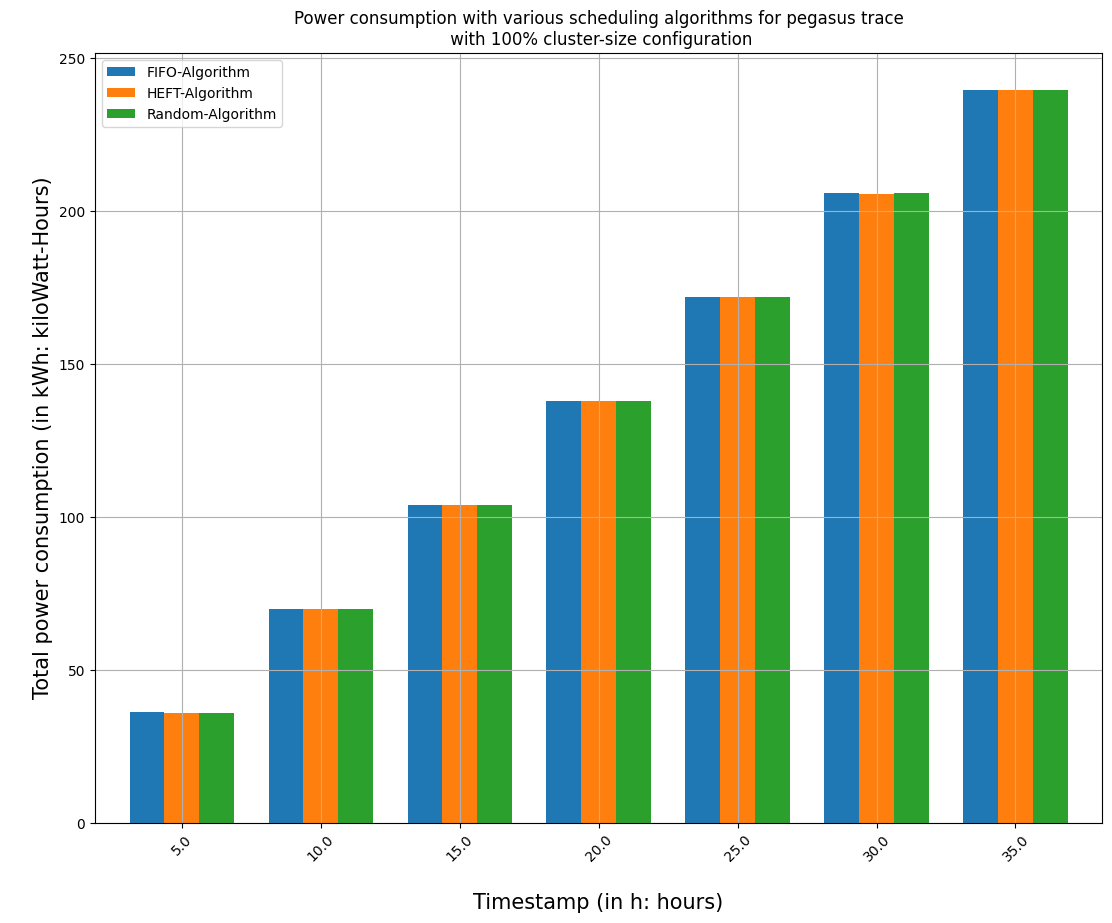

In [12]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['serverId'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# print(df_merged)
# Create a custom x-axis with every 599th value, due to very large number of elements in timestamp!
df_custom = df_merged[df_merged.index % 599 == 0]

# drop first column to have consistent distance of plots
df_custom = df_custom.drop(0)
df_custom = df_custom.reset_index(drop= True)
df_custom['timestamp_hours'] = round(df_custom['timestamp'] / 3600, 1) # convert seconds to hours
print(df_custom)

# Create a bar plot of the merged dataframe, grouped by timestamp
# fig, ax = plt.subplots()
# ax_enlarged = df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms for pegasus trace\n with 100% cluster-size configuration', width=.5)
# plt.figure(figsize=(13.5, 9.5))
# Create a plot with a broken x-axis
# bax = brokenaxes(xlims=((df_custom.index[0], df_custom.index[1]), (df_custom.index[2], df_custom.index[-1])), wspace=0.05)

# Plot the data within the broken x-axis
# bax.bar(df_custom.index, df_custom['FIFO-Algorithm'], width=5, label='FIFO-Algorithm')
# bax.bar(df_custom.index, df_custom['HEFT-Algorithm'], width=5, label='HEFT-Algorithm', bottom=df_custom['FIFO-Algorithm'])
# bax.bar(df_custom.index, df_custom['Random-Algorithm'], width=5, label='Random-Algorithm', bottom=df_custom['HEFT-Algorithm'])

# Calculate the bar positions for the groups within each segment
# x_values = df_custom['timestamp']
# print(x_values.iloc[0], x_values.iloc[1], x_values.iloc[-1])
# group_width = 20  # Width of each group of bars
# bar_width = 20  # Width of individual bars within a group
# num_columns = len(df_custom.columns) - 1  # Number of columns (excluding the 'timestamp' column)

# Calculate the total width for each group
# total_group_width = num_columns * group_width
# 
# bax = brokenaxes(xlims=((0,x_values.iloc[0]),(x_values.iloc[1] - total_group_width / 2, x_values.iloc[-1] + total_group_width / 2)), wspace=0.05)
# 
# for i in range(num_columns):
#     x_pos = x_values + (i - (num_columns / 2 - 0.5 )) * group_width + (bar_width * (num_columns / 2))
#     bax.bar(x_pos, df_custom.iloc[:, i + 1], width=bar_width, label=df_custom.columns[i + 1])
#     
# Add a legend
# bax.legend(loc='upper left')
# bax.set_xlabel('Timestamp (in s: seconds)', labelpad=25)
# bax.set_ylabel('Total power consumption (in kWh: kiloWatt-Hours)', labelpad=35)
# plt.title('Total power usage value sampled over time (comparing various task-scheduling algorithms)')
ax_enlarged = df_custom.plot.bar(x='timestamp_hours', y=['FIFO-Algorithm','HEFT-Algorithm','Random-Algorithm'], title='Power consumption with various scheduling algorithms for pegasus trace\n with 100% cluster-size configuration', width=.75, figsize=(13, 10))
# ax_enlarged.set_xticks(custom_x)
# ax_enlarged.set_xticklabels(custom_x_labels)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('\nTotal power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('\nTimestamp (in h: hours)', fontsize=15)
# plt.figure(figsize=(14.5, 8.5))
# plt.set_size_inches(14.5, 8.5)
plt.grid(True)
plt.savefig('multiple_hosts_energy_plotted_trace_pegasus_100.png', bbox_inches='tight')
plt.show()

In [13]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

      timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0            30        0.096333        0.096333          0.096333
1            60        0.195499        0.195499          0.195499
2            90        0.294666        0.294666          0.294666
3           120        0.393833        0.393833          0.393833
4           150        0.492999        0.492999          0.492999
...         ...             ...             ...               ...
4194     125850      239.834130      239.737785        239.806486
4195     125880      239.890797      239.794451        239.863152
4196     125910      239.947464      239.851118        239.919819
4197     125940      240.004131      239.907785        239.976486
4198     125970      240.060797      239.964452        240.033153

[4199 rows x 4 columns]


In [14]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 240.06079749606536 kWh
Total energy consumption in HEFT algorithm for executing given trace - 239.96445165506606 kWh
Total energy consumption in Random algorithm for executing given trace - 240.03315261254704 kWh


In [15]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[240.06079749606536, 239.96445165506606, 240.03315261254704]


In [16]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for pegasus workload trace and 100% cluster-size configuration.")


Resource scheduling algorithm HEFT is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 0.04015% worse energy-efficiency than the scheduling algorithm HEFT for pegasus workload trace and 100% cluster-size configuration.
Scheduling algorithm Random records 0.02863% worse energy-efficiency than the scheduling algorithm HEFT for pegasus workload trace and 100% cluster-size configuration.
